# Structured and time series data

This notebook contains an implementation of the third place result in the Rossman Kaggle competition as detailed in Guo/Berkhahn's [Entity Embeddings of Categorical Variables](https://arxiv.org/abs/1604.06737).

The motivation behind exploring this architecture is it's relevance to real-world application. Most data used for decision making day-to-day in industry is structured and/or time-series data. Here we explore the end-to-end process of using neural networks with practical structured data problems.

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='/home/paperspace/data/Predict/data/'

In [3]:
!pwd

/home/paperspace/fastai2/fastai-master/courses/dl1


In [3]:
os.listdir('/home/paperspace/data/Predict/data/')

['individual_stocks_5yr',
 'master.csv',
 '.ipynb_checkpoints',
 'CPIAUCNS.csv',
 'all_sp.csv',
 'CPIAUCNS',
 'sub.csv',
 'wget-log',
 'models',
 '__MACOSX',
 'CPI.csv',
 'all_stocks_5yr.csv',
 'script.ipynb',
 'tmp']

In [58]:
train = pd.read_csv('/home/paperspace/data/Predict/data/master.csv', low_memory=False)

In [59]:
train.drop('Unnamed: 0', axis=1, inplace=True)

In [60]:
train

,DATE,Close,High,Low,Open,AGO,JPN,Holiday,Intervention,Month,Unemployed,USD_Index
0,959731080000000,106.600,106.600,106.600,106.600,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
1,959731380000000,106.650,106.650,106.650,106.650,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
2,959732340000000,106.640,106.650,106.640,106.650,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
3,959732880000000,106.660,106.660,106.660,106.660,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
4,959733180000000,106.670,106.670,106.670,106.670,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
5,959733240000000,106.660,106.660,106.660,106.660,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
6,959734200000000,106.610,106.610,106.580,106.580,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
7,959734320000000,106.600,106.600,106.600,106.600,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
8,959735820000000,106.620,106.620,106.620,106.620,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
9,959736240000000,106.630,106.640,106.630,106.630,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487


In [61]:
test = train.copy()

In [8]:
test

,DATE,Close,High,Low,Open,AGO,JPN,Holiday,Intervention,Month,Unemployed,USD_Index
0,959731080000000,106.600,106.600,106.600,106.600,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
1,959731380000000,106.650,106.650,106.650,106.650,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
2,959732340000000,106.640,106.650,106.640,106.650,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
3,959732880000000,106.660,106.660,106.660,106.660,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
4,959733180000000,106.670,106.670,106.670,106.670,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
5,959733240000000,106.660,106.660,106.660,106.660,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
6,959734200000000,106.610,106.610,106.580,106.580,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
7,959734320000000,106.600,106.600,106.600,106.600,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
8,959735820000000,106.620,106.620,106.620,106.620,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
9,959736240000000,106.630,106.640,106.630,106.630,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487


In [9]:
train.head()

,DATE,Close,High,Low,Open,AGO,JPN,Holiday,Intervention,Month,Unemployed,USD_Index
0,959731080000000,106.60,106.60,106.60,106.60,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
1,959731380000000,106.65,106.65,106.65,106.65,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
2,959732340000000,106.64,106.65,106.64,106.65,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
3,959732880000000,106.66,106.66,106.66,106.66,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
4,959733180000000,106.67,106.67,106.67,106.67,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487


In [10]:
0.05 * len(train)

291053.85000000003

In [11]:
train0 = train[:-291054].copy()

In [62]:
test0 = train[-291054:].copy()

In [13]:
train0

,DATE,Close,High,Low,Open,AGO,JPN,Holiday,Intervention,Month,Unemployed,USD_Index
0,959731080000000,106.600,106.600,106.600,106.600,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
1,959731380000000,106.650,106.650,106.650,106.650,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
2,959732340000000,106.640,106.650,106.640,106.650,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
3,959732880000000,106.660,106.660,106.660,106.660,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
4,959733180000000,106.670,106.670,106.670,106.670,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
5,959733240000000,106.660,106.660,106.660,106.660,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
6,959734200000000,106.610,106.610,106.580,106.580,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
7,959734320000000,106.600,106.600,106.600,106.600,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
8,959735820000000,106.620,106.620,106.620,106.620,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
9,959736240000000,106.630,106.640,106.630,106.630,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487


In [14]:
test0

,DATE,Close,High,Low,Open,AGO,JPN,Holiday,Intervention,Month,Unemployed,USD_Index
5530023,1495426320000000,111.547,111.553,111.539,111.549,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285
5530024,1495426380000000,111.548,111.557,111.540,111.550,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285
5530025,1495426440000000,111.549,111.567,111.548,111.554,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285
5530026,1495426500000000,111.555,111.563,111.550,111.560,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285
5530027,1495426560000000,111.559,111.561,111.555,111.558,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285
5530028,1495426620000000,111.558,111.569,111.558,111.567,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285
5530029,1495426680000000,111.568,111.568,111.556,111.558,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285
5530030,1495426740000000,111.558,111.558,111.544,111.551,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285
5530031,1495426800000000,111.551,111.558,111.551,111.555,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285
5530032,1495426860000000,111.554,111.556,111.542,111.542,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285


In [15]:
test0.reset_index(inplace=True)

In [16]:
Id = [i for i in range(len(test0))]

In [17]:
len(Id)

291054

In [18]:
test0['Id'] = Id

In [19]:
max(Id)

291053

In [20]:
test0

,index,DATE,Close,High,Low,Open,AGO,JPN,Holiday,Intervention,Month,Unemployed,USD_Index,Id
0,5530023,1495426320000000,111.547,111.553,111.539,111.549,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,0
1,5530024,1495426380000000,111.548,111.557,111.540,111.550,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,1
2,5530025,1495426440000000,111.549,111.567,111.548,111.554,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,2
3,5530026,1495426500000000,111.555,111.563,111.550,111.560,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,3
4,5530027,1495426560000000,111.559,111.561,111.555,111.558,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,4
5,5530028,1495426620000000,111.558,111.569,111.558,111.567,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,5
6,5530029,1495426680000000,111.568,111.568,111.556,111.558,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,6
7,5530030,1495426740000000,111.558,111.558,111.544,111.551,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,7
8,5530031,1495426800000000,111.551,111.558,111.551,111.555,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,8
9,5530032,1495426860000000,111.554,111.556,111.542,111.542,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,9


In [21]:
test0.drop(['index', 'Close', 'High', 'Low', 'Open'], axis=1, inplace=True)

In [22]:
test0

,DATE,AGO,JPN,Holiday,Intervention,Month,Unemployed,USD_Index,Id
0,1495426320000000,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,0
1,1495426380000000,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,1
2,1495426440000000,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,2
3,1495426500000000,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,3
4,1495426560000000,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,4
5,1495426620000000,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,5
6,1495426680000000,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,6
7,1495426740000000,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,7
8,1495426800000000,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,8
9,1495426860000000,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,9


In [23]:
train, test = train0.copy(), test0.copy()

In [24]:
train

,DATE,Close,High,Low,Open,AGO,JPN,Holiday,Intervention,Month,Unemployed,USD_Index
0,959731080000000,106.600,106.600,106.600,106.600,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
1,959731380000000,106.650,106.650,106.650,106.650,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
2,959732340000000,106.640,106.650,106.640,106.650,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
3,959732880000000,106.660,106.660,106.660,106.660,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
4,959733180000000,106.670,106.670,106.670,106.670,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
5,959733240000000,106.660,106.660,106.660,106.660,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
6,959734200000000,106.610,106.610,106.580,106.580,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
7,959734320000000,106.600,106.600,106.600,106.600,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
8,959735820000000,106.620,106.620,106.620,106.620,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487
9,959736240000000,106.630,106.640,106.630,106.630,16440924.0,126843000.0,0.0,0.0,5,318.0,108.3487


In [25]:
test

,DATE,AGO,JPN,Holiday,Intervention,Month,Unemployed,USD_Index,Id
0,1495426320000000,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,0
1,1495426380000000,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,1
2,1495426440000000,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,2
3,1495426500000000,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,3
4,1495426560000000,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,4
5,1495426620000000,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,5
6,1495426680000000,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,6
7,1495426740000000,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,7
8,1495426800000000,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,8
9,1495426860000000,28813463.0,126994511.0,0.0,0.0,5,68.0,103.4285,9


In [26]:
#Skip me on pass number one
#del joined, joined_test

In [27]:
joined, joined_test = train.copy(), test.copy()

In [28]:
joined.columns

Index(['DATE', 'Close', 'High', 'Low', 'Open', 'AGO', 'JPN', 'Holiday',
       'Intervention', 'Month', 'Unemployed', 'USD_Index'],
      dtype='object')

In [29]:
# rex = joined

# type([i for i in rex.index][0])

# type([i for i in rex['Close']][0])

# type([i for i in rex['AGO']][0])

# type([i for i in rex['JPN']][0])

# type([i for i in rex['Holiday']][0])

# type([i for i in rex['Intervention']][0])

# type([i for i in rex['Month']][0])

In [30]:
joined_test['DATE'] = pd.to_datetime(joined_test['DATE'], unit='us')

In [31]:
joined['DATE'] = pd.to_datetime(joined['DATE'], unit='us')

In [32]:
joined_test.columns

Index(['DATE', 'AGO', 'JPN', 'Holiday', 'Intervention', 'Month', 'Unemployed',
       'USD_Index', 'Id'],
      dtype='object')

In [33]:
#joined_test = joined_test.set_index('DATE')

In [34]:
cat_vars = ['Holiday', 'Month']

contin_vars = ['AGO', 'JPN',
       'Intervention', 'USD_Index', 'Unemployed']

n = len(train); n

5530023

In [35]:
#joined.reset_index(inplace=True)
#joined_test.reset_index(inplace=True)

In [36]:
##TRY THIS

In [37]:
#1
dep = 'Close'
joined = joined[cat_vars+contin_vars+[dep, 'DATE']].copy()

In [38]:
#2
joined_test[dep] = 0
joined_test = joined_test[cat_vars+contin_vars+[dep, 'DATE', 'Id']].copy()

In [39]:
#3
for v in cat_vars: joined[v] = joined[v].astype('category').cat.as_ordered()

In [40]:
#4
apply_cats(joined_test, joined)

In [41]:
#5
for v in contin_vars:
    joined[v] = joined[v].fillna(0).astype('float32')
    joined_test[v] = joined_test[v].fillna(0).astype('float32')

In [3]:
joined = pd.read_csv('/home/paperspace/soy/9_2/train.csv')

In [4]:
joined_test = pd.read_csv('/home/paperspace/soy/9_2/test.csv')

In [9]:
train = joined.copy()
test = joined_test.copy()
n = len(train); n

20700

In [5]:
joined

,Date,soux_H,soux_L,indianap_H,indianap_L,memphis_H,memphis_L,Gold,USD,Oil,...,Canada_Area,Canada_Production,RussianF_Area,RussianF_Production,CentAmer_Area,CentAmer_Production,Bolivia_Area,Bolivia_Production,Africa_Area,Africa_Production
0,2018-09-02,77,66,88.0,72.0,91,73,1198.333276,90.133818,75.282004,...,2611657.62,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0
1,2018-09-01,81,66,82.0,70.0,91,72,1198.333276,90.133818,75.282004,...,2611657.62,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0
2,2018-08-31,82,70,84.0,66.0,88,73,1198.333276,90.133818,75.282004,...,2611657.62,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0
3,2018-08-30,75,61,88.0,66.0,90,73,1200.440760,89.740220,75.303550,...,2611657.62,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0
4,2018-08-29,75,49,90.0,73.0,93,73,1202.969842,89.668657,75.465145,...,2611657.62,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0
5,2018-08-28,66,53,89.0,72.0,93,76,1209.292367,89.811783,75.077316,...,2611657.62,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0
6,2018-08-27,78,66,90.0,72.0,94,76,1202.548328,89.811783,73.849189,...,2611657.62,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0
7,2018-08-26,87,70,77.0,68.0,94,76,1202.548328,90.169599,74.280111,...,2611657.62,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0
8,2018-08-25,84,59,76.0,60.0,91,72,1202.548328,90.169599,73.946147,...,2611657.62,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0
9,2018-08-24,81,66,78.0,56.0,89,67,1193.380604,90.169600,74.730000,...,2611657.62,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0


In [6]:
joined_test

,Date,US_Area,US_Production,Brazil_Area,Brazil_Production,Argentina_Area,Argentina_Production,China_Area,China_Production,India_Area,...,Canada_Production,RussianF_Area,RussianF_Production,CentAmer_Area,CentAmer_Production,Bolivia_Area,Bolivia_Production,Africa_Area,Africa_Production,bean_settle
0,2018-12-31,36097585.92,119500000.0,36750000.0,119500000.0,19000000.0,37000000.0,3782630.0,14200000.0,1336221.92,...,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0,0
1,2018-12-30,36097585.92,119500000.0,36750000.0,119500000.0,19000000.0,37000000.0,3782630.0,14200000.0,1336221.92,...,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0,0
2,2018-12-29,36097585.92,119500000.0,36750000.0,119500000.0,19000000.0,37000000.0,3782630.0,14200000.0,1336221.92,...,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0,0
3,2018-12-28,36097585.92,119500000.0,36750000.0,119500000.0,19000000.0,37000000.0,3782630.0,14200000.0,1336221.92,...,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0,0
4,2018-12-27,36097585.92,119500000.0,36750000.0,119500000.0,19000000.0,37000000.0,3782630.0,14200000.0,1336221.92,...,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0,0
5,2018-12-26,36097585.92,119500000.0,36750000.0,119500000.0,19000000.0,37000000.0,3782630.0,14200000.0,1336221.92,...,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0,0
6,2018-12-25,36097585.92,119500000.0,36750000.0,119500000.0,19000000.0,37000000.0,3782630.0,14200000.0,1336221.92,...,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0,0
7,2018-12-24,36097585.92,119500000.0,36750000.0,119500000.0,19000000.0,37000000.0,3782630.0,14200000.0,1336221.92,...,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0,0
8,2018-12-23,36097585.92,119500000.0,36750000.0,119500000.0,19000000.0,37000000.0,3782630.0,14200000.0,1336221.92,...,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0,0
9,2018-12-22,36097585.92,119500000.0,36750000.0,119500000.0,19000000.0,37000000.0,3782630.0,14200000.0,1336221.92,...,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0,0


In [7]:
get_cv_idxs??

In [10]:
idxs = get_cv_idxs(n, val_pct=150000/n)
joined_samp = joined.iloc[idxs].set_index("Date")
samp_size = len(joined_samp); samp_size

20700

To run on the full dataset, use this instead:

In [4]:
samp_size = n
joined_samp = joined.set_index("Date")

NameError: name 'n' is not defined

We can now process our data...

In [11]:
joined_samp.head(2)

,soux_H,soux_L,indianap_H,indianap_L,memphis_H,memphis_L,Gold,USD,Oil,bean_high,...,Canada_Area,Canada_Production,RussianF_Area,RussianF_Production,CentAmer_Area,CentAmer_Production,Bolivia_Area,Bolivia_Production,Africa_Area,Africa_Production
Date,,,,,,,,,,,,,,,,,,,,,
1994-01-12,24,10,38.0,32.0,43,39,386.1,92.1777,14.000,1434.5,...,878442.0,570859.0,4318000.0,3931900.0,9227491.0,16011005.0,580050.0,421542.0,313357.0,584657.0
1963-05-06,78,50,73.0,45.0,82,62,35.2,108.2242,2.304,1434.5,...,220995.0,87260.0,18000.0,8000.0,9678923.0,6962645.0,645370.0,505360.0,27426.0,56258.0


In [12]:
df, y, nas, mapper = proc_df(joined_samp, 'bean_settle', do_scale=True)
yl = np.log(y)

In [15]:
joined_test = joined_test.set_index("Date")

In [17]:
joined_test

,US_Area,US_Production,Brazil_Area,Brazil_Production,Argentina_Area,Argentina_Production,China_Area,China_Production,India_Area,India_Production,...,Canada_Production,RussianF_Area,RussianF_Production,CentAmer_Area,CentAmer_Production,Bolivia_Area,Bolivia_Production,Africa_Area,Africa_Production,bean_settle
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,36097585.92,119500000.0,36750000.0,119500000.0,19000000.0,37000000.0,3782630.0,14200000.0,1336221.92,8400000.0,...,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0,0
2018-12-30,36097585.92,119500000.0,36750000.0,119500000.0,19000000.0,37000000.0,3782630.0,14200000.0,1336221.92,8400000.0,...,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0,0
2018-12-29,36097585.92,119500000.0,36750000.0,119500000.0,19000000.0,37000000.0,3782630.0,14200000.0,1336221.92,8400000.0,...,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0,0
2018-12-28,36097585.92,119500000.0,36750000.0,119500000.0,19000000.0,37000000.0,3782630.0,14200000.0,1336221.92,8400000.0,...,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0,0
2018-12-27,36097585.92,119500000.0,36750000.0,119500000.0,19000000.0,37000000.0,3782630.0,14200000.0,1336221.92,8400000.0,...,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0,0
2018-12-26,36097585.92,119500000.0,36750000.0,119500000.0,19000000.0,37000000.0,3782630.0,14200000.0,1336221.92,8400000.0,...,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0,0
2018-12-25,36097585.92,119500000.0,36750000.0,119500000.0,19000000.0,37000000.0,3782630.0,14200000.0,1336221.92,8400000.0,...,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0,0
2018-12-24,36097585.92,119500000.0,36750000.0,119500000.0,19000000.0,37000000.0,3782630.0,14200000.0,1336221.92,8400000.0,...,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0,0
2018-12-23,36097585.92,119500000.0,36750000.0,119500000.0,19000000.0,37000000.0,3782630.0,14200000.0,1336221.92,8400000.0,...,8000000.0,11419500.0,15481501.52,6574473.18,11966328.0,2141214.14,3135177.0,296425.5,568778.0,0


In [ ]:
joined

In [ ]:
joined_test['Sales']

In [18]:
df_test, _, nas, mapper = proc_df(joined_test, 'bean_settle', do_scale=True,
                                  mapper=mapper, na_dict=nas)

KeyError: "['soux_H'] not in index"

In [95]:
df.head(2)

,Store,DayOfWeek,Year,Month,Day,StateHoliday,CompetitionMonthsOpen,Promo2Weeks,StoreType,Assortment,...,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,1,5,3,7,31,1,25,1,3,1,...,-1.620066,0.149027,-0.142774,-1.844823,1.732492,1.724334,0.604461,1.13112,1.113717,2.04105
2015-07-31,2,5,3,7,31,1,25,26,1,1,...,-1.264031,-0.960613,-0.142774,-0.488722,1.294578,1.724334,0.926957,1.13112,1.113717,2.04105


In time series data, cross-validation is not random. Instead, our holdout data is generally the most recent data, as it would be in real application. This issue is discussed in detail in [this post](http://www.fast.ai/2017/11/13/validation-sets/) on our web site.

One approach is to take the last 25% of rows (sorted by date) as our validation set.

In [118]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

An even better option for picking a validation set is using the exact same length of time period as the test set uses - this is implemented here:

In [ ]:
val_idx = np.flatnonzero(
    (df.index<=datetime.datetime(2014,9,17)) & (df.index>=datetime.datetime(2014,8,1)))

In [ ]:
val_idx=[0]

In [ ]:
joined.columns

In [ ]:
type([i for i in joined['Date']][0])

## DL

We're ready to put together our models.

Root-mean-squared percent error is the metric Kaggle used for this competition.

In [119]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

We can create a ModelData object directly from out data frame.

In [120]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128,
                                       test_df=df_test)

Some categorical variables have a lot more levels than others. Store, in particular, has over a thousand!

In [121]:
cat_sz = [(c, len(joined_samp[c].cat.categories)+1) for c in cat_vars]

In [122]:
cat_sz

[('Holiday', 3), ('Month', 13)]

We use the *cardinality* of each variable (that is, its number of unique values) to decide how large to make its *embeddings*. Each level will be associated with a vector with length defined as below.

In [123]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [124]:
emb_szs

[(3, 2), (13, 7)]

In [125]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
m.summary()

OrderedDict([('Embedding-1',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 2]),
                           ('trainable', True),
                           ('nb_params', 6)])),
             ('Embedding-2',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 7]),
                           ('trainable', True),
                           ('nb_params', 91)])),
             ('Dropout-3',
              OrderedDict([('input_shape', [-1, 9]),
                           ('output_shape', [-1, 9]),
                           ('nb_params', 0)])),
             ('BatchNorm1d-4',
              OrderedDict([('input_shape', [-1, 5]),
                           ('output_shape', [-1, 5]),
                           ('trainable', True),
                           ('nb_params', 10)])),
             ('Linear-5',
              OrderedDict([('input_shape', [-1, 14]),
                           ('output_shape', 

In [126]:
lr = 1e-3
m.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 23%|██▎       | 7312/32403 [00:25<01:26, 290.30it/s, loss=0.000935]

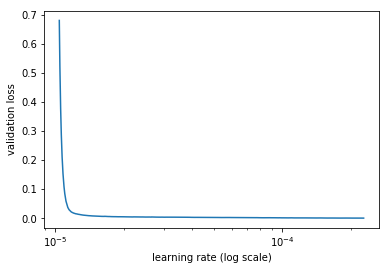

In [127]:
m.sched.plot(100)

### Sample

In [128]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [129]:
m.fit(lr, 3, metrics=[exp_rmspe])

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

  3%|▎         | 991/32403 [00:03<01:56, 268.90it/s, loss=0.000961]

Exception in thread Thread-43:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   exp_rmspe                           
    0      0.000222   0.034935   0.148542  
    1      0.000155   0.034638   0.146445                            
    2      0.000149   0.014339   0.091956                            



[array([ 0.01434]), 0.091956187524643934]

In [136]:
m.fit(lr, 5, metrics=[exp_rmspe], cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                           
    0      0.000121   0.014918   0.098123  
    1      0.000122   0.01741    0.10221                             
    2      0.000121   0.018155   0.102785                            
    3      0.000127   0.023792   0.117459                            
    4      0.000126   0.033439   0.141509                            



[array([ 0.03344]), 0.14150861788998639]

In [86]:
m.fit(lr, 2, metrics=[exp_rmspe], cycle_len=4)

HBox(children=(IntProgress(value=0, description='Epoch', max=8), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.000483   0.000409   0.020238  
    1      0.000436   0.000258   0.015511                        
    2      0.000381   0.000211   0.013609                        
    3      0.000343   0.000195   0.012942                        
    4      0.000478   0.000247   0.015134                        
    5      0.000409   0.000444   0.021196                        
    6      0.000339   0.000198   0.013123                        
    7      0.000325   0.000192   0.012823                        



[array([ 0.00019]), 0.012823415606862048]

### All

In [144]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.005,0.01], y_range=y_range)
lr = 1e-4

In [145]:
m.fit(lr, 1, metrics=[exp_rmspe])

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                           
    0      0.000342   0.038136   0.153139  



[array([ 0.03814]), 0.15313888755623392]

In [96]:
m.fit(lr, 3, metrics=[exp_rmspe])

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.001166   0.001336   0.035873  
    1      0.001022   0.000539   0.023157                        
    2      0.000883   0.000511   0.022469                        



[array([ 0.00051]), 0.022469471738930939]

In [104]:
m.fit(lr, 3, metrics=[exp_rmspe], cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.000522   0.000311   0.017047  
    1      0.000474   0.000303   0.016801                        
    2      0.000454   0.00028    0.016048                        



[array([ 0.00028]), 0.016047820588316521]

### Test

In [105]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [106]:
m.fit(lr, 3, metrics=[exp_rmspe])

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                      
    0      0.00387    0.000811   0.028627  
    1      0.001143   0.000519   0.022575                       
    2      0.000787   0.00043    0.020742                        



[array([ 0.00043]), 0.020741987976821679]

In [107]:
m.fit(lr, 3, metrics=[exp_rmspe], cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   exp_rmspe                       
    0      0.00056    0.000305   0.016937  
    1      0.000463   0.000248   0.014998                        
    2      0.000428   0.000235   0.014508                        



[array([ 0.00023]), 0.014508080061524481]

In [117]:
m.save('val0')

In [118]:
m.load('val0')

In [146]:
x,y=m.predict_with_targs()

In [147]:
exp_rmspe(x,y)

0.17330508891099877

In [148]:
pred_test=m.predict(True)

In [149]:
pred_test = np.exp(pred_test)

In [150]:
joined_test['Close']=pred_test

In [141]:
joined_test

,Holiday,Month,AGO,JPN,Intervention,USD_Index,Unemployed,Close,Id
DATE,,,,,,,,,
2017-05-22 04:12:00,0.0,5,28813464.0,126994512.0,0.0,103.428497,68.0,110.524994,0
2017-05-22 04:13:00,0.0,5,28813464.0,126994512.0,0.0,103.428497,68.0,110.524994,1
2017-05-22 04:14:00,0.0,5,28813464.0,126994512.0,0.0,103.428497,68.0,110.524994,2
2017-05-22 04:15:00,0.0,5,28813464.0,126994512.0,0.0,103.428497,68.0,110.524994,3
2017-05-22 04:16:00,0.0,5,28813464.0,126994512.0,0.0,103.428497,68.0,110.524994,4
2017-05-22 04:17:00,0.0,5,28813464.0,126994512.0,0.0,103.428497,68.0,110.524994,5
2017-05-22 04:18:00,0.0,5,28813464.0,126994512.0,0.0,103.428497,68.0,110.524994,6
2017-05-22 04:19:00,0.0,5,28813464.0,126994512.0,0.0,103.428497,68.0,110.524994,7
2017-05-22 04:20:00,0.0,5,28813464.0,126994512.0,0.0,103.428497,68.0,110.524994,8


In [71]:
real = (test0['Close'])

In [72]:
guess = (joined_test['Close'])

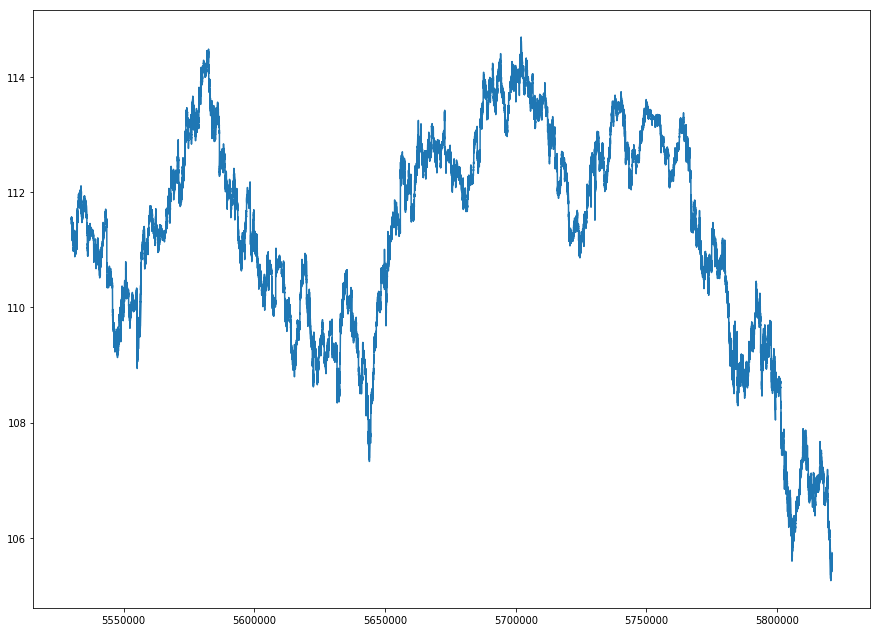

In [73]:
real.plot(figsize=(15, 11))

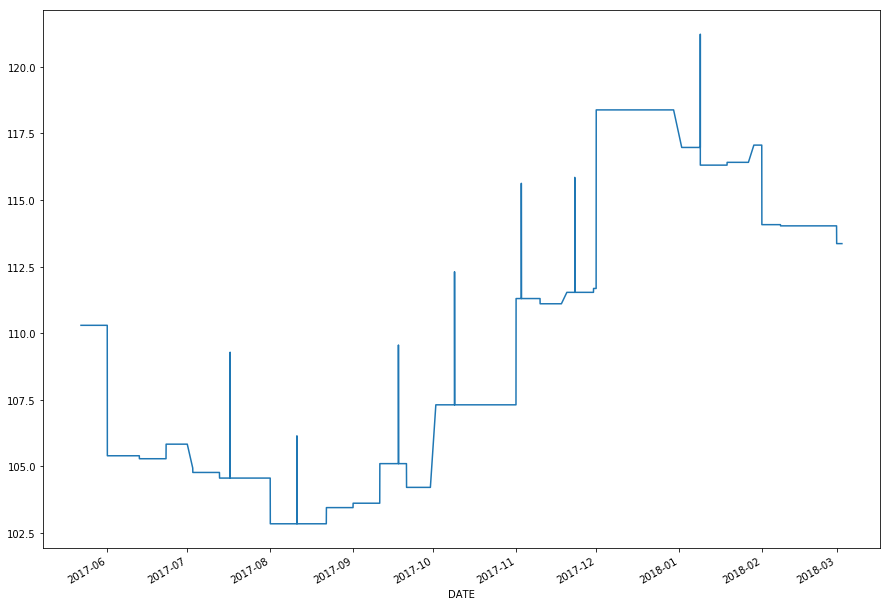

In [135]:
guess.plot(figsize=(15, 11))

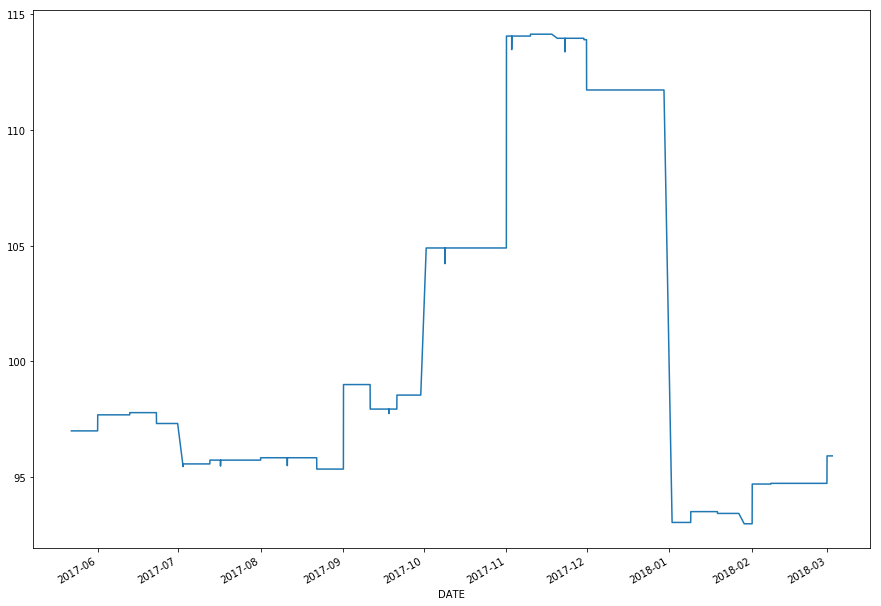

In [143]:
(joined_test['Close']).plot(figsize=(15, 11))

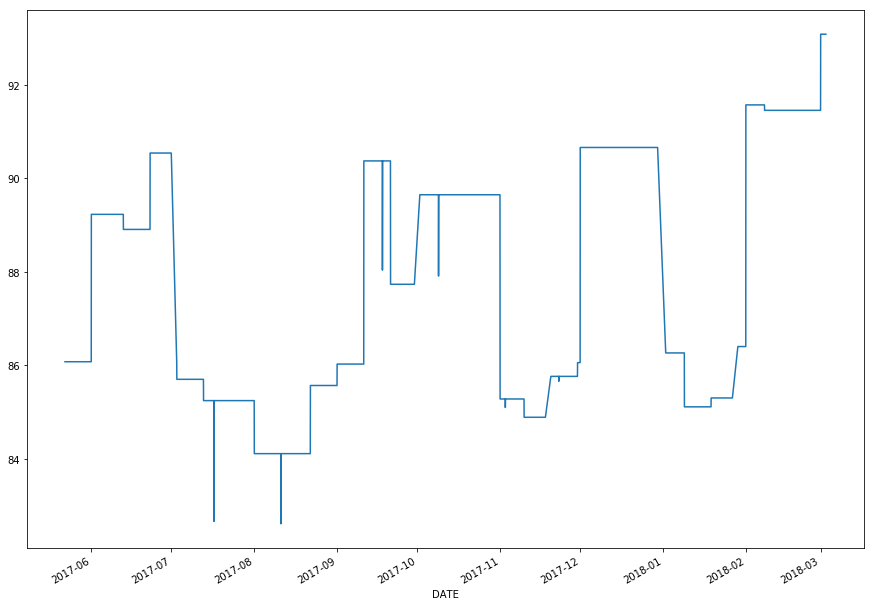

In [151]:
(joined_test['Close']).plot(figsize=(15, 11))

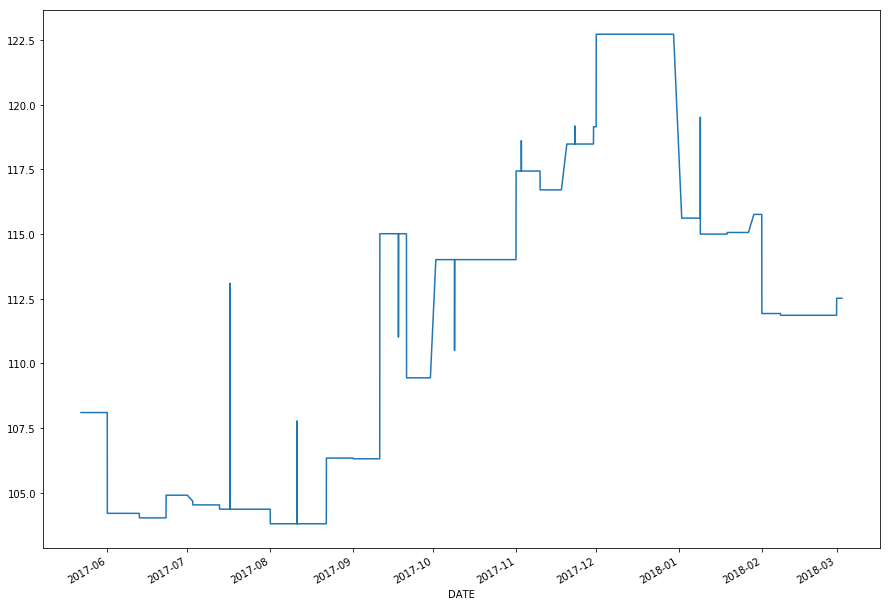

In [103]:
(joined_test['Close']).plot(figsize=(15, 11))

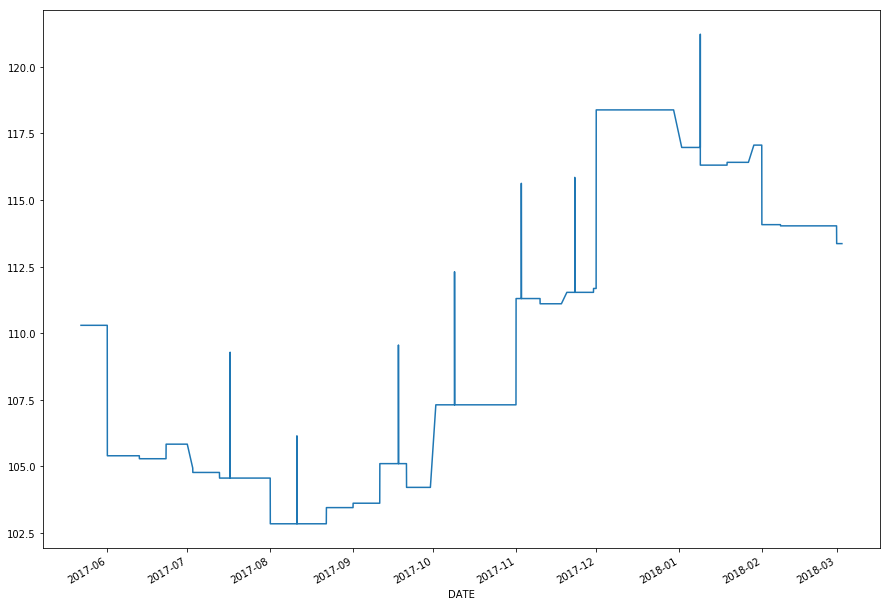

In [114]:
(joined_test['Close']).plot(figsize=(15, 11))

In [124]:
csv_fn=f'{PATH}tmp/sub.csv'

In [125]:
joined_test[['Id','Close']].to_csv(csv_fn, index=False)

In [126]:
FileLink(csv_fn)

/home/paperspace/data/rossman/tmp/sub.csv

## RF

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, df.values, yl)

In [129]:
m = RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
m.fit(trn, y_trn);

KeyboardInterrupt: 

In [ ]:
preds = m.predict(val)
m.score(trn, y_trn), m.score(val, y_val), m.oob_score_, exp_rmspe(preds, y_val)